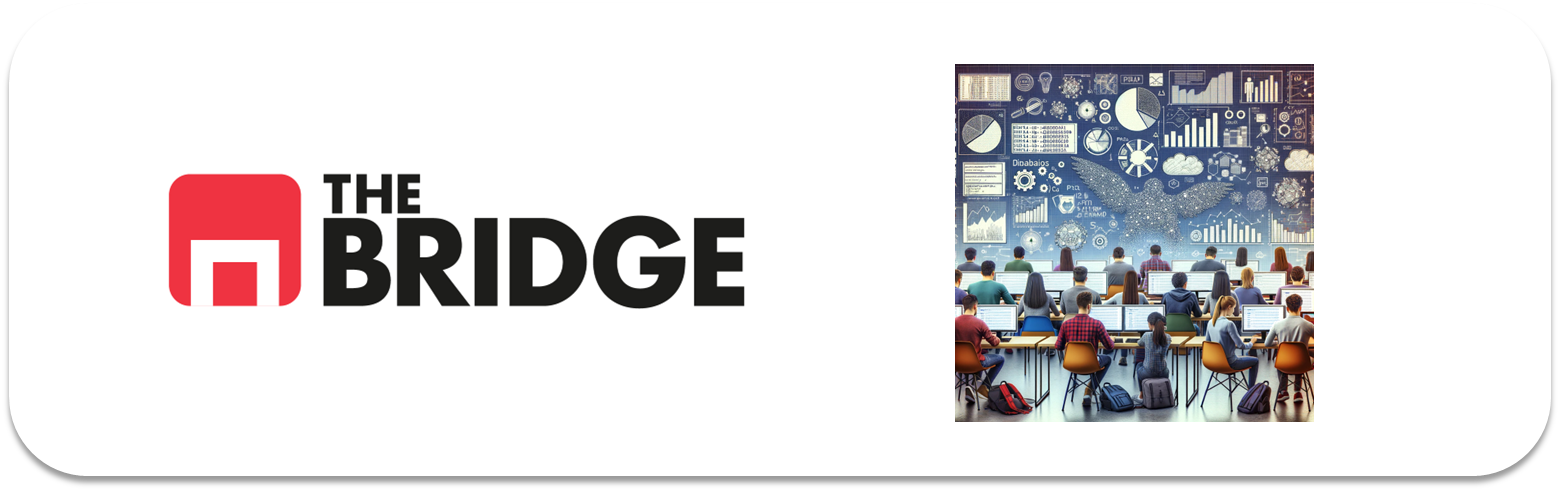

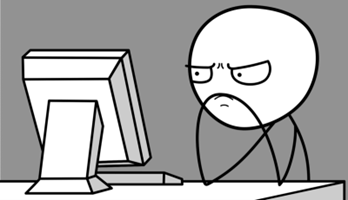

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

price               1.000000
enginesize          0.866433
curbweight          0.824212
horsepower          0.810986
carwidth            0.744310
carlength           0.652071
boreratio           0.546099
wheelbase           0.506118
carheight           0.044458
compressionratio    0.035218
stroke              0.023941
symboling           0.005183
peakrpm             0.070017
citympg             0.711245
highwaympg          0.713503
Name: price, dtype: float64

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

*Así de primeras parece que nos quedaríamos el tamaño del motor, la potencia en caballos y el curbweight (el peso en vacío), luego lo comprobaremos al pintar los pesos*

### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [9]:
# Separación x e y
X_train = train_set.drop(columns= [______])
y_train = ________[target]

X_test = _________.drop(columns = [target])
y_test = _________[_______]

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(________[___________]), columns= features_num)

lin_reg = LinearRegression()
lin_reg.____(X_train,______)




NameError: name '______' is not defined

In [ ]:
# Separación x e y





LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

*Para Train*

MSE: 8477376.468057917
RMSE: 2911.593458582073
MAE: 2186.495238619768
MAPE: 0.16914187169594525
R2: 0.8578523829898764


*Para Test*

MSE: 14358029.116948422
RMSE: 3789.1990073033144
MAE: 2680.4299831594244
MAPE: 0.24232218332843805
R2: 0.8181239192410048


*Ha empeorado en todas las métricas, con un MAPE por ejemplo que ha subido hasta el 24%, y el RMSE también ha aumentado un porcetanje sensible. No es muy mala generalización pero podríamos intentar mejorarla. Veamos que tal con la regularización*

### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

Ridge(alpha=10)

MSE: 8866123.31820579
RMSE: 2977.60362006191
MAE: 2158.243656697338
MAPE: 0.16054493837684683
R2: 0.8513339231129411


### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

MSE: 14118957.772767346
RMSE: 3757.5201626561297
MAE: 2683.5502270180973
MAPE: 0.2291455406651298
R2: 0.821152284676628


*Observa las diferencias entre train y test para este caso y la regresión lineal sin regularizar, es ligeramente mejor la generalización del Ridge*

### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

Lasso(alpha=125)

MSE: 8877155.12413877
RMSE: 2979.4555079978572
MAE: 2160.7677449902203
MAPE: 0.1614650620404028
R2: 0.85114894313351


### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

MSE: 14195935.840034952
RMSE: 3767.749439656909
MAE: 2720.0084839611914
MAPE: 0.23513380339328693
R2: 0.8201771878116615


*Mejora la regresión lineal pero no es especialmente mejor que la Ridge*

### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

ElasticNet(alpha=0.2, l1_ratio=0.7)

MSE: 8860451.22887099
RMSE: 2976.651008914379
MAE: 2158.1465786718622
MAPE: 0.16057182002794834
R2: 0.8514290320166742


MSE: 14110909.146069543
RMSE: 3756.4490075162134
MAE: 2683.009361902569
MAPE: 0.22918717932234328
R2: 0.8212542382711894


*Termina pareciéndose a las anteriores. Tendríamos que optimizar los hiperparámetros alpha y l1_ratio en este caso. Y el alpha en las otras dos regularizaciones*

### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [22]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

*La función muestra dos gráficos de barras horizontales, el de la izquierda con valor y signo el de la derecha solo con el valor de los coeficientes*

**Regresion_Lineal**

,coefs
symboling,259.207046
wheelbase,835.387850
carlength,-937.566044
carwidth,1112.646820
carheight,497.057372
curbweight,227.500700
enginesize,4976.563274
boreratio,-97.680684
stroke,-1010.387520
compressionratio,1387.225279


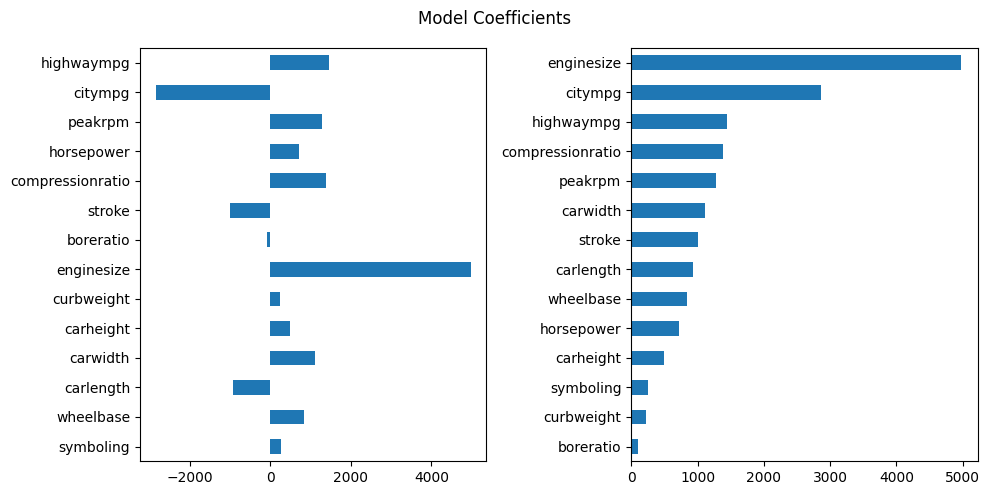

In [23]:
show_coefs(lin_reg)

**Ridge**

,coefs
symboling,298.268290
wheelbase,399.106955
carlength,-260.468831
carwidth,1075.310793
carheight,286.690243
curbweight,801.906271
enginesize,3666.715607
boreratio,-39.792695
stroke,-798.377036
compressionratio,1002.400432


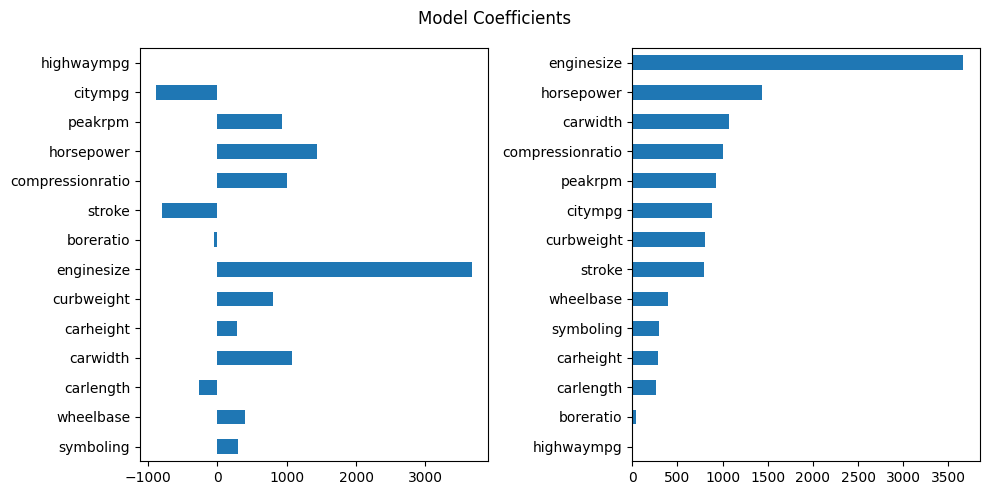

In [24]:
show_coefs(ridge_reg)

*Observa la diferencia de los coeficientes a la derecha comparados con la regresión lineal, son los mismos pero suavizados, en algún caso en sobremedida (seguramente por ser colineal con otro), como es el caso de `highwaympg`*

**Lasso**

,coefs
symboling,3.897387
wheelbase,0.000000
carlength,0.000000
carwidth,1185.253288
carheight,193.993785
curbweight,260.713690
enginesize,4368.898684
boreratio,0.000000
stroke,-754.360885
compressionratio,965.709886


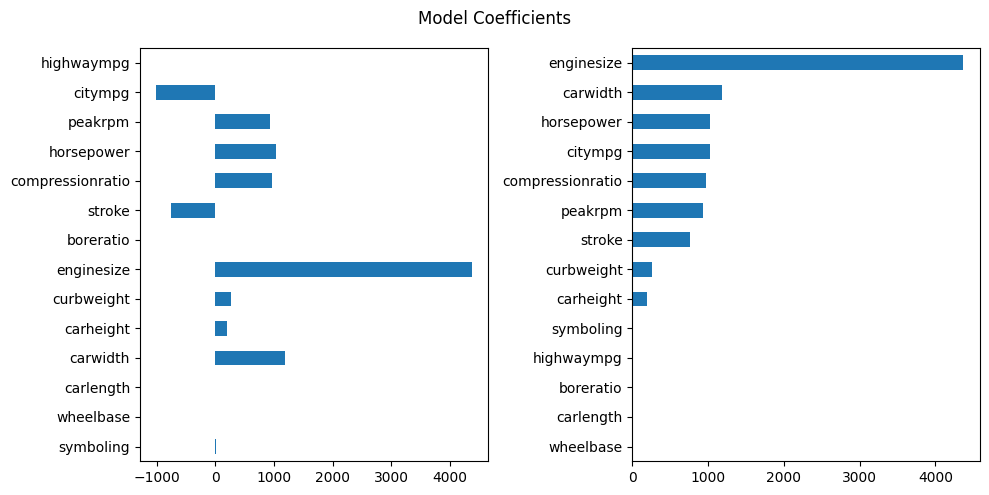

In [25]:
show_coefs(lasso_reg)

*En cambio, esta regularización no suaviza directamente selecciona, mira lo que ha ocurrido con los coeficientes con menores pesos en la regresión lineal, en esta al entrenar se los ha cepillado (coeficiente a cero, fíjate en los cinco últimos de la derecha). El efecto selección de features se ve claramente.*

**ElasticNet**

,coefs
symboling,298.268290
wheelbase,399.106955
carlength,-260.468831
carwidth,1075.310793
carheight,286.690243
curbweight,801.906271
enginesize,3666.715607
boreratio,-39.792695
stroke,-798.377036
compressionratio,1002.400432


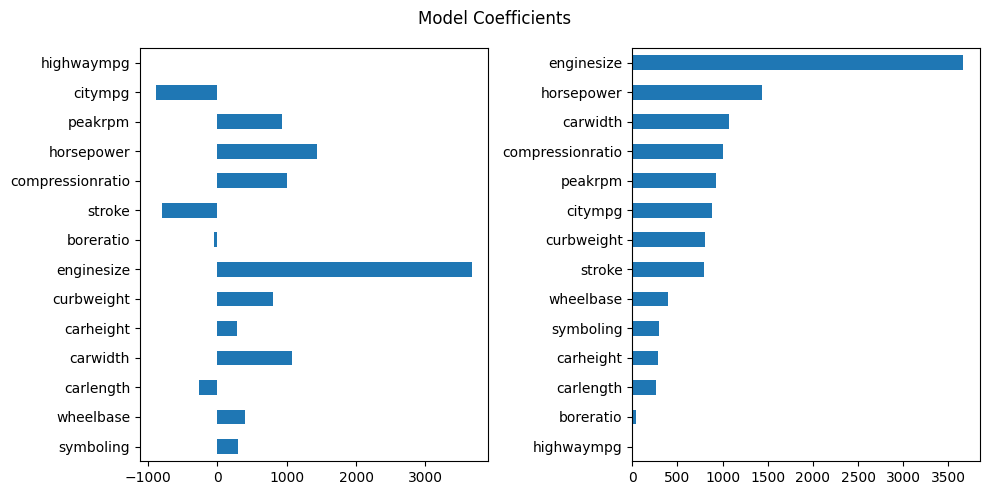

In [26]:
show_coefs(ridge_reg)

*Como era de esperar se ha hecho una mezcla de suavizado y selección, y aun a pesar del alto valor de L1, ha suavizado más que seleccionado*